In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
dataset = sns.load_dataset('tips')

# Display dataset info
print("="*40)
print("📌 DATASET INFORMATION")
print("="*40)
print(dataset.info())

# Display first 5 rows
print("\n" + "="*40)
print("🔍 FIRST 5 ROWS OF THE DATASET")
print("="*40)
print(dataset.head())

# Display last 5 rows
print("\n" + "="*40)
print("📌 LAST 5 ROWS OF THE DATASET")
print("="*40)
print(dataset.tail())

# Display basic statistics
print("\n" + "="*40)
print("📊 BASIC STATISTICS")
print("="*40)
print(dataset.describe())

📌 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

🔍 FIRST 5 ROWS OF THE DATASET
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

📌 LAST 5 ROWS OF THE DATASET
     total_bill   tip     sex smoker   day 

In [4]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("\n" + "="*40)
print("❗ MISSING VALUES IN DATASET")
print("="*40)
print(missing_values)

#SINCE THERE ARE NO MISSING VALUES WE'LL WORK WITH ORIGINAL DATASET


❗ MISSING VALUES IN DATASET
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


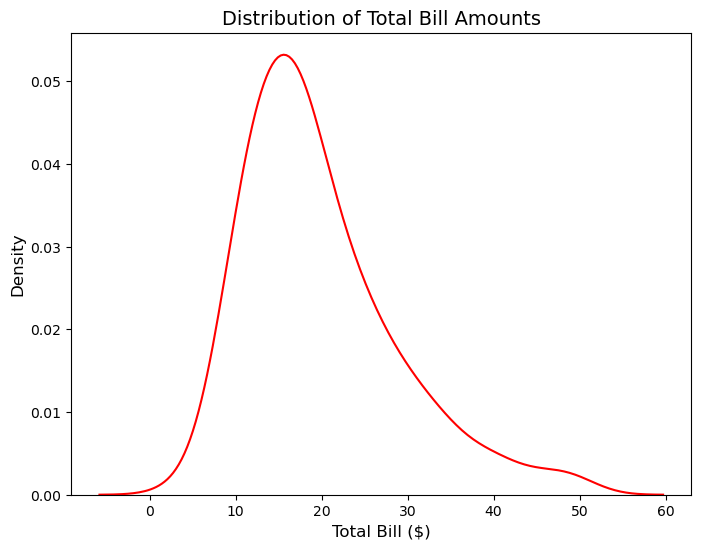

In [11]:

plt.figure(figsize=(8,6))
sns.kdeplot(data=dataset, x="total_bill", fill=False, color="r")  
plt.title("Distribution of Total Bill Amounts", fontsize=14)
plt.xlabel("Total Bill ($)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()


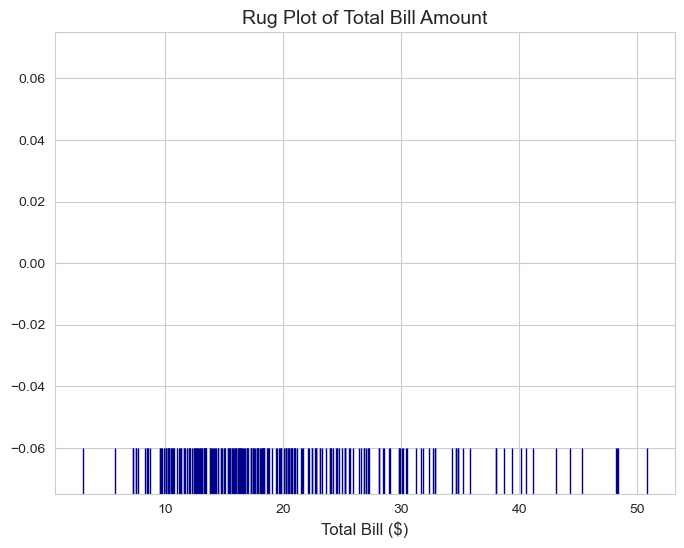

In [13]:
#rugplot
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

sns.rugplot(data=dataset, x='total_bill', height=0.1, color='darkblue')

plt.title('Rug Plot of Total Bill Amount', fontsize=14)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.show()


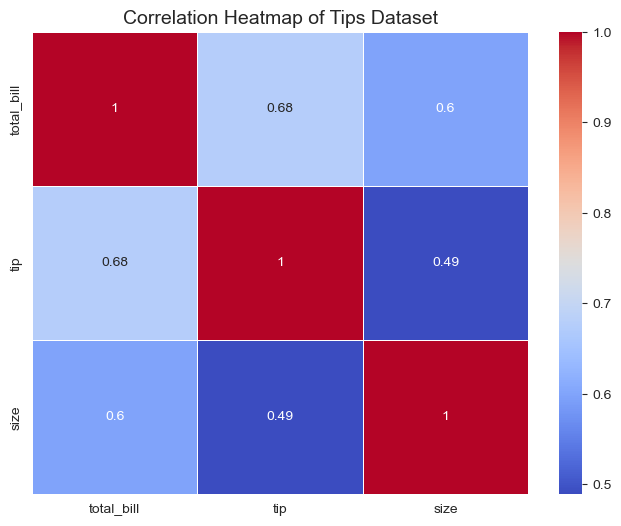

In [19]:
#Heatmap(only works with numerical data so convert data to numeric or drop the non numeric data)
corr_matrix = dataset.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Tips Dataset', fontsize=14)
plt.show()


<Figure size 800x600 with 0 Axes>

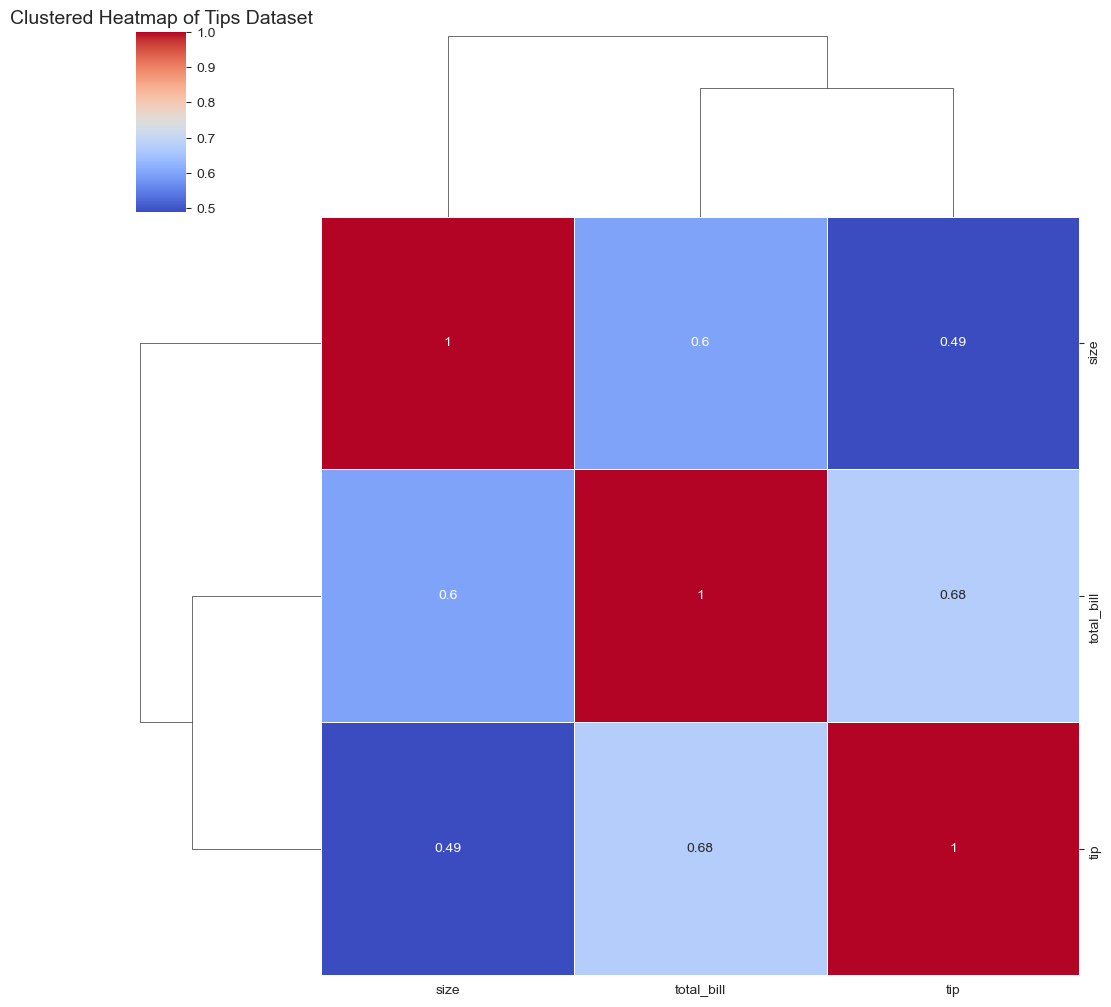

In [22]:
plt.figure(figsize=(8,6))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Clustered Heatmap of Tips Dataset", fontsize=14)
plt.show()


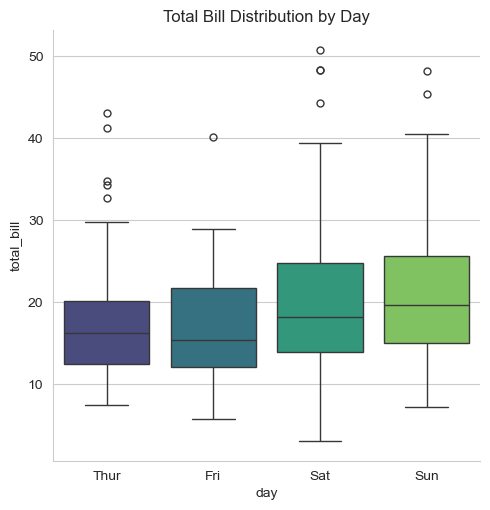

In [25]:
#catplot 
sns.catplot(data=dataset, x="day", y="total_bill", kind="box", palette="viridis",hue='day',legend=False)
plt.title("Total Bill Distribution by Day")
plt.show()


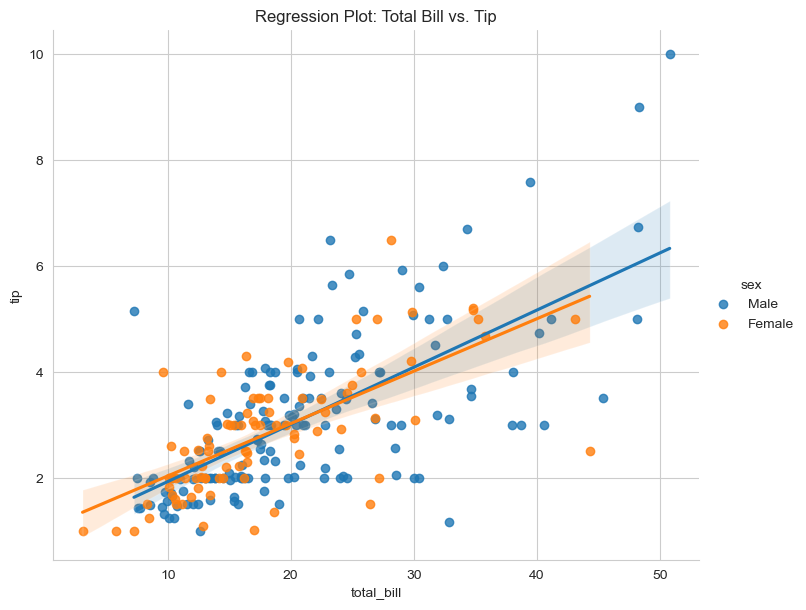

In [27]:
#Implot 
sns.lmplot(data=dataset, x="total_bill", y="tip", hue="sex", height=6, aspect=1.2)
plt.title("Regression Plot: Total Bill vs. Tip")
plt.show()


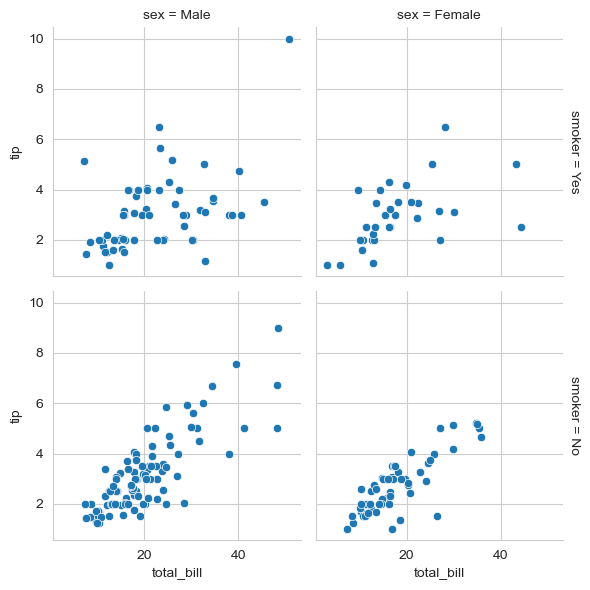

In [30]:
#FacetGrid
g = sns.FacetGrid(dataset, col="sex", row="smoker", margin_titles=True)
g.map(sns.scatterplot, "total_bill", "tip")
